In [ ]:
# Import Necessary Libraries

In [19]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import re

In [2]:
data = pd.read_csv("Mobile phone price.csv")

In [3]:
data.head()

,Brand,Model,Storage,RAM,Screen Size (inches),Camera (MP),Battery Capacity (mAh),Price ($)
0,Apple,iPhone 13 Pro,128 GB,6 GB,6.1,12 + 12 + 12,3095,999
1,Samsung,Galaxy S21 Ultra,256 GB,12 GB,6.8,108 + 10 + 10 + 12,5000,1199
2,OnePlus,9 Pro,128 GB,8 GB,6.7,48 + 50 + 8 + 2,4500,899
3,Xiaomi,Redmi Note 10 Pro,128 GB,6 GB,6.67,64 + 8 + 5 + 2,5020,279
4,Google,Pixel 6,128 GB,8 GB,6.4,50 + 12.2,4614,799


In [33]:
# Step 1: Strip whitespace from all column names
data.columns = data.columns.str.strip()

# Step 2: Rename column
data.rename(columns={'screen size (inches)': 'screen_size',}, inplace=True)

# Step 3: Confirm the change
print(data.columns.tolist())

['Brand', 'Model', 'Storage', 'RAM', 'Screen Size (inches)', 'Camera', 'Battery_Capacity', 'Price ($)']


In [11]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   Brand                   407 non-null    object
 1   Model                   407 non-null    object
 2   Storage                 407 non-null    object
 3   RAM                     407 non-null    object
 4   Screen Size (inches)    407 non-null    object
 5   Camera                  407 non-null    object
 6   Battery Capacity (mAh)  407 non-null    int64 
 7   Price ($)               407 non-null    object
dtypes: int64(1), object(7)
memory usage: 25.6+ KB


In [12]:
# The Most of columns are object so convert to int or float

In [13]:
print('Number of rows:',data.shape[0])
print('Number of columns:',data.shape[1])

Number of rows: 407
Number of columns: 8


In [ ]:
## Cleaning the 'storage' column by removing 'GB' and converting it to numeric values
data['Storage'] = data['Storage'].str.replace('GB', '').astype(float)

#  For TB
# df['Storage'] = df['Storage'].str.replace('TB', '', regex=False).astype(float)
# df.loc[df['Storage'].astype(str).str.contains('TB'), 'Storage'] *= 1024

In [22]:
## Cleaning the 'RAM' column by removing 'GB' and converting it to numeric values
data['RAM'] = data['RAM'].str.replace('GB', '').astype(float)

In [46]:
p = data[data['Screen_Size']=='6.8 + 3.9'].index
p

Index([88], dtype='int64')

In [47]:
data.loc[88,'Screen_Size'] = 10.7

In [48]:
data['Screen_Size'].unique()

array(['6.1', '6.8', '6.7', '6.67', '6.4', '6.55', '6.78', '6.43', '6.5',
       '6.62', '5.4', '6.2', '6.51', '6.6', '4.7', '6.58', '6.52', '6.44',
       '6.53', '6.56', 10.7, '4.5', '6.39', '5.9', '5.5', '6.81', '5.99',
       '6.82', '6.3', '6.22', '6', '6.35', '6.9', '6.76', '6.49', '6.72',
       '5.7', '6.47', 7.6, '6.15', '6.57'], dtype=object)

In [49]:
data.loc[data[data['Screen_Size']== '7.6 (unfolded)'].index,'Screen_Size'] = 7.6

In [50]:
data['Screen_Size'] = data['Screen_Size'].astype('float64')

In [51]:
data['Screen_Size'].unique()

array([ 6.1 ,  6.8 ,  6.7 ,  6.67,  6.4 ,  6.55,  6.78,  6.43,  6.5 ,
        6.62,  5.4 ,  6.2 ,  6.51,  6.6 ,  4.7 ,  6.58,  6.52,  6.44,
        6.53,  6.56, 10.7 ,  4.5 ,  6.39,  5.9 ,  5.5 ,  6.81,  5.99,
        6.82,  6.3 ,  6.22,  6.  ,  6.35,  6.9 ,  6.76,  6.49,  6.72,
        5.7 ,  6.47,  7.6 ,  6.15,  6.57])

In [54]:
## Cleaning the 'Price' column by removing '$' and converting it to numeric values
data['Price'] = data['Price'].str.replace('$', '').str.replace(',', '').str.strip()
data['Price'] = pd.to_numeric(data['Price'])
data['Price'].unique()

array([ 999, 1199,  899,  279,  799,  249,  699,  329,  449,  199,  299,
        379,  179,  729,  599,  139,  189,  399,  259,  159,  229,  499,
        129,  529,  369, 1099,  169,   99,  459,  239, 1299,  429,  659,
        269,  359,  549,  319,  349,  969,  149,  219,  109,  389,  309,
        849,  469,  209,  119,  339,  289,  130,  749,  649,  419, 1399,
       1999, 1049], dtype=int64)

In [74]:
data.drop(['Camera','Model','Screen_Size'],axis=1,inplace=True)

KeyError: "['Camera'] not found in axis"

In [75]:
data.drop(['Model','Screen_Size'],axis=1,inplace=True)

In [76]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             407 non-null    object 
 1   Storage           407 non-null    float64
 2   RAM               407 non-null    float64
 3   Battery_Capacity  407 non-null    int64  
 4   Price             407 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 16.0+ KB


In [59]:
data.describe()

,Storage,RAM,Screen_Size,Battery_Capacity,Price,screen_size
count,407.000000,407.000000,407.000000,407.000000,407.000000,1.0
mean,123.046683,5.837838,6.480835,4676.476658,408.314496,10.7
std,64.963160,2.431980,0.382667,797.193713,299.684768,NaN
min,32.000000,2.000000,4.500000,1821.000000,99.000000,10.7
25%,64.000000,4.000000,6.440000,4300.000000,199.000000,10.7
50%,128.000000,6.000000,6.500000,5000.000000,299.000000,10.7
75%,128.000000,8.000000,6.590000,5000.000000,499.000000,10.7
max,512.000000,16.000000,10.700000,7000.000000,1999.000000,10.7


In [60]:
data.drop('screen_size',axis=1,inplace=True)

In [61]:
data.describe()

,Storage,RAM,Screen_Size,Battery_Capacity,Price
count,407.000000,407.000000,407.000000,407.000000,407.000000
mean,123.046683,5.837838,6.480835,4676.476658,408.314496
std,64.963160,2.431980,0.382667,797.193713,299.684768
min,32.000000,2.000000,4.500000,1821.000000,99.000000
25%,64.000000,4.000000,6.440000,4300.000000,199.000000
50%,128.000000,6.000000,6.500000,5000.000000,299.000000
75%,128.000000,8.000000,6.590000,5000.000000,499.000000
max,512.000000,16.000000,10.700000,7000.000000,1999.000000


In [62]:
#  check missing values 
data.isna().sum()

Brand               0
Model               0
Storage             0
RAM                 0
Screen_Size         0
Battery_Capacity    0
Price               0
dtype: int64

<Axes: >

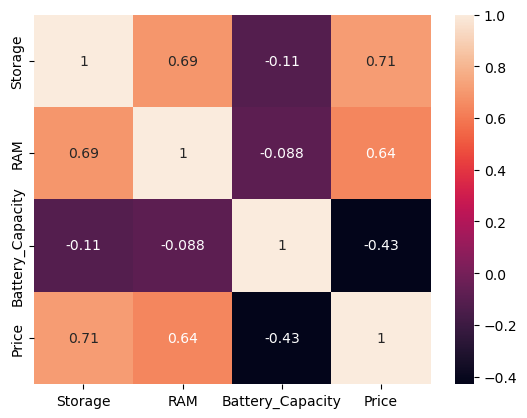

In [77]:
sns.heatmap(data.corr(numeric_only=True), annot =True)

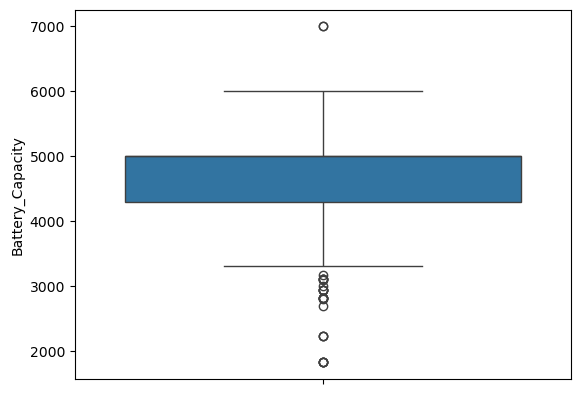

In [67]:
sns.boxplot(data=data,y="Battery_Capacity")
plt.show()

Number of outliers in 'price': 29


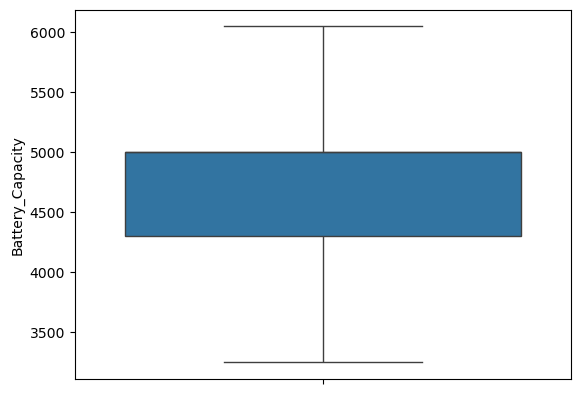

In [72]:
Q1 = data['Battery_Capacity'].quantile(0.25)
Q3 = data['Battery_Capacity'].quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Identify outliers
outliers = data[(data['Battery_Capacity'] < lower_bound) | (data['Battery_Capacity'] > upper_bound)]
print(f"Number of outliers in 'price': {outliers.shape[0]}")

# Handling outliers
data['Battery_Capacity'] = data['Battery_Capacity'].clip(lower=lower_bound, upper=upper_bound)

sns.boxplot(data=data,y="Battery_Capacity")
plt.show()

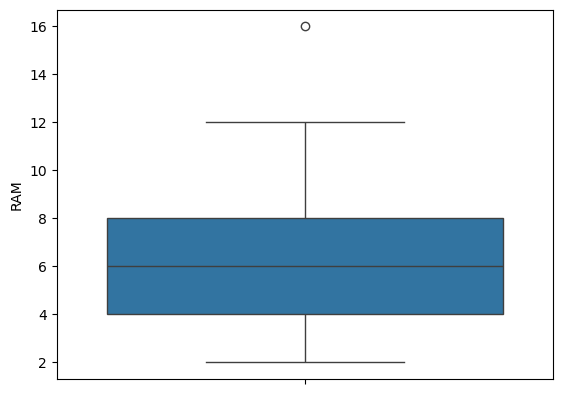

In [68]:
sns.boxplot(data=data,y="RAM")
plt.show()

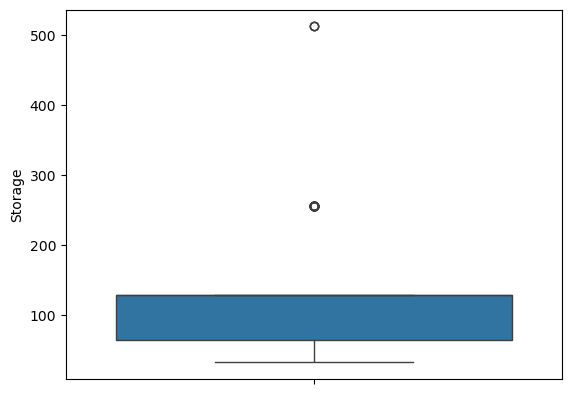

In [69]:
sns.boxplot(data=data,y="Storage")
plt.show()

In [78]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 407 entries, 0 to 406
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Brand             407 non-null    object 
 1   Storage           407 non-null    float64
 2   RAM               407 non-null    float64
 3   Battery_Capacity  407 non-null    int64  
 4   Price             407 non-null    int64  
dtypes: float64(2), int64(2), object(1)
memory usage: 16.0+ KB


In [81]:
object_columns = data.select_dtypes(include=['object']).columns
data[object_columns]

,Brand
0,Apple
1,Samsung
2,OnePlus
3,Xiaomi
4,Google
...,...
402,Samsung
403,Xiaomi
404,Apple
405,Oppo


# One Hot Encoding

In [82]:
data1 = pd.get_dummies(data, columns=object_columns)

In [83]:
data1

,Storage,RAM,Battery_Capacity,Price,Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,128.0,6.0,3250,999,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,256.0,12.0,5000,1199,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,128.0,8.0,4500,899,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,128.0,6.0,5020,279,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,128.0,8.0,4614,799,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,128.0,8.0,4300,1049,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,128.0,6.0,4160,349,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,128.0,6.0,3687,1099,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,128.0,8.0,4025,429,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [ ]:
# For regression tasks where the target variable is continuous, it's generally not necessary to scale the target variable.
# Algorithms like Linear Regression, Decision Trees, Random Forest, 
# and Gradient Boosting Machines can handle continuous target variables without requiring scaling.

# if you're using algorithms that are sensitive to the scale of the target variable, such as Support Vector Machines (SVM)
# with a regression (SVR) or NuSVR kernel, you might consider scaling the target variable

In [86]:
from sklearn.preprocessing import MinMaxScaler
non_boolean_numerical_features = ['Storage', 'RAM', 'Battery_Capacity', 'Price']
scaler = MinMaxScaler()
data1[non_boolean_numerical_features] = scaler.fit_transform(data1[non_boolean_numerical_features])

In [87]:
data1

,Storage,RAM,Battery_Capacity,Price,Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.000000,0.473684,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.625000,0.578947,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.446429,0.421053,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.632143,0.094737,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.487143,0.368421,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.375000,0.500000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.325000,0.131579,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.156071,0.526316,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.276786,0.173684,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [88]:
y_scaled = data1['Price']
y_scaled


0      0.473684
1      0.578947
2      0.421053
3      0.094737
4      0.368421
         ...   
402    0.500000
403    0.131579
404    0.526316
405    0.173684
406    0.289474
Name: Price, Length: 407, dtype: float64

In [90]:
x = data1.drop(['Price'],axis=1)
x

,Storage,RAM,Battery_Capacity,Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
0,0.200000,0.285714,0.000000,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
1,0.466667,0.714286,0.625000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
2,0.200000,0.428571,0.446429,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False,False
3,0.200000,0.285714,0.632143,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
4,0.200000,0.428571,0.487143,False,False,False,False,True,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
402,0.200000,0.428571,0.375000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
403,0.200000,0.285714,0.325000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
404,0.200000,0.285714,0.156071,True,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
405,0.200000,0.428571,0.276786,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [92]:
#splitting the data into training set and test set
from sklearn.model_selection import train_test_split
x_train,x_test,y_train, y_test = train_test_split(x,y_scaled,random_state=42)

In [93]:
x_train

,Storage,RAM,Battery_Capacity,Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
75,0.466667,0.714286,0.339286,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
110,0.200000,0.285714,0.625000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
113,0.200000,0.285714,0.375000,False,False,False,False,False,False,True,False,False,False,False,False,False,False,False,False
16,0.200000,0.428571,0.267857,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
66,0.200000,0.428571,0.378571,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
71,0.200000,0.142857,0.625000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
106,0.000000,0.071429,0.625000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True,False
270,0.000000,0.071429,0.625000,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
348,0.200000,0.142857,0.625000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False


In [95]:
x_test

,Storage,RAM,Battery_Capacity,Brand_Apple,Brand_Asus,Brand_Blackberry,Brand_CAT,Brand_Google,Brand_Huawei,Brand_LG,Brand_Motorola,Brand_Nokia,Brand_OnePlus,Brand_Oppo,Brand_Realme,Brand_Samsung,Brand_Sony,Brand_Vivo,Brand_Xiaomi
70,0.200000,0.142857,0.982143,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
218,0.066667,0.142857,0.625000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
258,0.200000,0.428571,0.982143,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
33,0.200000,0.285714,0.625000,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False,False
42,0.066667,0.142857,0.982143,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
181,0.200000,0.142857,0.982143,False,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False
250,0.000000,0.000000,0.625000,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False
380,0.066667,0.071429,0.625000,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,True
261,0.000000,0.000000,0.625000,False,False,False,False,False,False,False,False,False,False,False,True,False,False,False,False


In [97]:
from sklearn.linear_model import LinearRegression

linear_reg = LinearRegression()
linear_reg.fit(x_train, y_train)

LinearRegression()

In [98]:
y_pred_train = linear_reg.predict(x_train)
y_pred_test = linear_reg.predict(x_test)

In [100]:
from sklearn.metrics import mean_squared_error, r2_score
# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.004902116167582261
Testing MSE: 0.004232415873350045
Training R2 Score: 0.8059005135126812
Testing R2 Score: 0.8199117773954652


# DecisionTreeRegressor

In [126]:

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.tree import DecisionTreeRegressor, export_graphviz

# Define the hyperparameters grid
param_grid = {
    'max_depth': [3, 5, 7, 9],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Decision Tree model
dt_regressor = DecisionTreeRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=dt_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 36 candidates, totalling 180 fits


GridSearchCV(cv=5, estimator=DecisionTreeRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [3, 5, 7, 9],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='neg_mean_squared_error', verbose=1)

In [127]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(x_train, y_train)

Best Hyperparameters: {'max_depth': 9, 'min_samples_leaf': 1, 'min_samples_split': 2}


RandomForestRegressor(max_depth=9)

In [128]:
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0015970703363131227
Testing MSE: 0.002784401973717793
Training R2 Score: 0.9367639359074196
Testing R2 Score: 0.8815244017912405


# KNN

In [102]:
from sklearn.neighbors import KNeighborsClassifier  # For classification
from sklearn.neighbors import KNeighborsRegressor   # For regression

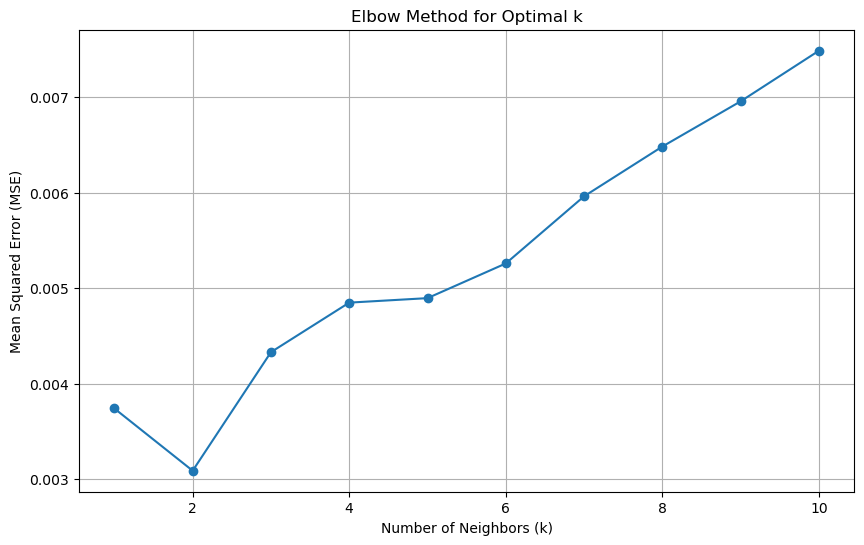

In [104]:
mse_values = []
r2_values = []
max_neighbors = 10  
for k in range(1, max_neighbors + 1):
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(x_train, y_train)
    y_pred = knn.predict(x_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    mse_values.append(mse)
    r2_values.append(r2)

# Plotting the elbow curve
plt.figure(figsize=(10, 6))
plt.plot(range(1, max_neighbors + 1), mse_values, marker='o')
plt.xlabel('Number of Neighbors (k)')
plt.ylabel('Mean Squared Error (MSE)')
plt.title('Elbow Method for Optimal k')
plt.grid(True)
plt.show()

In [105]:
# Choose the optimal k based on the elbow curve (lowest MSE)
optimal_k = mse_values.index(min(mse_values)) + 1
print(f"Optimal number of neighbors (k): {optimal_k}")

Optimal number of neighbors (k): 2


In [106]:
# Train the KNN model with the optimal k
knn = KNeighborsRegressor(n_neighbors=optimal_k)
knn.fit(x_train, y_train)

KNeighborsRegressor(n_neighbors=2)

In [109]:
# Evaluate the model
y_pred_train = knn.predict(x_train)
y_pred_test = knn.predict(x_test)

In [110]:

train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0019500213432632483
Testing MSE: 0.0030902721199283015
Training R2 Score: 0.9227888266153871
Testing R2 Score: 0.8685097046000498


# RandomForestRegressor

In [114]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [None, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

# Initialize the Random Forest model
rf_regressor = RandomForestRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=rf_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 81 candidates, totalling 405 fits


GridSearchCV(cv=5, estimator=RandomForestRegressor(random_state=42), n_jobs=-1,
             param_grid={'max_depth': [None, 5, 10],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [116]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the Random Forest model with the best hyperparameters
best_rf_regressor = RandomForestRegressor(**best_params)
best_rf_regressor.fit(x_train, y_train)

Best Hyperparameters: {'max_depth': 10, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}


RandomForestRegressor(max_depth=10)

In [117]:
# Make predictions
y_pred_train = best_rf_regressor.predict(x_train)
y_pred_test = best_rf_regressor.predict(x_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0015970703363131227
Testing MSE: 0.002784401973717793
Training R2 Score: 0.9367639359074196
Testing R2 Score: 0.8815244017912405


In [119]:
from xgboost import XGBRegressor

# Define the hyperparameters grid
param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [3, 5, 7],
    'learning_rate': [0.1, 0.01, 0.001]
}

# Initialize the XGBoost model
xgb_regressor = XGBRegressor(random_state=42)

# Initialize GridSearchCV with cross-validation
grid_search = GridSearchCV(estimator=xgb_regressor, param_grid=param_grid, cv=5, scoring='neg_mean_squared_error', verbose=1, n_jobs=-1)

# Fit the model with hyperparameter tuning
grid_search.fit(x_train, y_train)

Fitting 5 folds for each of 27 candidates, totalling 135 fits


GridSearchCV(cv=5,
             estimator=XGBRegressor(base_score=None, booster=None,
                                    callbacks=None, colsample_bylevel=None,
                                    colsample_bynode=None,
                                    colsample_bytree=None, device=None,
                                    early_stopping_rounds=None,
                                    enable_categorical=False, eval_metric=None,
                                    feature_types=None, feature_weights=None,
                                    gamma=None, grow_policy=None,
                                    importance_type=None,
                                    interaction_constraints=None...
                                    max_cat_to_onehot=None, max_delta_step=None,
                                    max_depth=None, max_leaves=None,
                                    min_child_weight=None, missing=nan,
                                    monotone_constraints=None,
                                    multi_strategy=None, n_estimators=None,
                                    n_jobs=None, num_parallel_tree=None, ...),
             n_jobs=-1,
             param_grid={'learning_rate': [0.1, 0.01, 0.001],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='neg_mean_squared_error', verbose=1)

In [122]:
# Get the best hyperparameters
best_params = grid_search.best_params_
print("Best Hyperparameters:", best_params)

# Train the XGBoost model with the best hyperparameters
best_xgb_regressor = XGBRegressor(**best_params, random_state=42)
best_xgb_regressor.fit(x_train, y_train)

Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 200}


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             feature_weights=None, gamma=None, grow_policy=None,
             importance_type=None, interaction_constraints=None,
             learning_rate=0.1, max_bin=None, max_cat_threshold=None,
             max_cat_to_onehot=None, max_delta_step=None, max_depth=3,
             max_leaves=None, min_child_weight=None, missing=nan,
             monotone_constraints=None, multi_strategy=None, n_estimators=200,
             n_jobs=None, num_parallel_tree=None, ...)

In [123]:
# Make predictions
y_pred_train = best_rf_regressor.predict(x_train)
y_pred_test = best_rf_regressor.predict(x_test)

# Evaluate the model
train_mse = mean_squared_error(y_train, y_pred_train)
test_mse = mean_squared_error(y_test, y_pred_test)
train_r2 = r2_score(y_train, y_pred_train)
test_r2 = r2_score(y_test, y_pred_test)

print(f"Training MSE: {train_mse}")
print(f"Testing MSE: {test_mse}")
print(f"Training R2 Score: {train_r2}")
print(f"Testing R2 Score: {test_r2}")

Training MSE: 0.0015970703363131227
Testing MSE: 0.002784401973717793
Training R2 Score: 0.9367639359074196
Testing R2 Score: 0.8815244017912405


In [131]:
models = {
    'Linear Regression': LinearRegression(),
    'Decision Tree': DecisionTreeRegressor(random_state=42),
    'Random Forest': RandomForestRegressor(random_state=42),
    'XGBoost': XGBRegressor(random_state=42)
}
results = []
for name, model in models.items():
    model.fit(x_train, y_train)
    y_pred_train = model.predict(x_train)
    y_pred_test = model.predict(x_test)
    train_mse = mean_squared_error(y_train, y_pred_train)
    test_mse = mean_squared_error(y_test, y_pred_test)
    train_r2 = r2_score(y_train, y_pred_train)
    test_r2 = r2_score(y_test, y_pred_test)
    results.append({'Model': name,
                    'Training MSE': train_mse,
                    'Testing MSE': test_mse,
                    'Training R2 Score': train_r2,
                    'Testing R2 Score': test_r2})
results_df = pd.DataFrame(results)
results_df

,Model,Training MSE,Testing MSE,Training R2 Score,Testing R2 Score
0,Linear Regression,0.004902,0.004232,0.805901,0.819912
1,Decision Tree,0.001065,0.002901,0.957838,0.876581
2,Random Forest,0.001571,0.002797,0.937809,0.880972
3,XGBoost,0.001075,0.003112,0.957454,0.867564
